In [4]:
# In general, using an exclamation mark before the command will pass the command to the shell (not to the Python interpreter)
# We always start with a dataset to train on. Let's download the tiny shakespeare dataset
!wget https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt

--2023-09-07 16:13:09--  https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt
Auflösen des Hostnamens raw.githubusercontent.com (raw.githubusercontent.com)… 2606:50c0:8001::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Verbindungsaufbau zu raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443 … verbunden.
HTTP-Anforderung gesendet, auf Antwort wird gewartet … 200 OK
Länge: 1115394 (1,1M) [text/plain]
Wird in »input.txt.1« gespeichert.

input.txt.1         100%[===================>]   1,06M  --.-KB/s    in 0,1s    

2023-09-07 16:13:09 (9,46 MB/s) - »input.txt.1« gespeichert [1115394/1115394]



In [5]:
# read it in to inspect it
with open('input.txt', 'r', encoding='utf-8') as f:
    text = f.read()

In [6]:
print("length of dataset in characters: ", len(text))

length of dataset in characters:  1115394


In [7]:
# let's look at the first 1000 characters
print(text[:1000])

First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger for bread, not in thirst for revenge.



In [8]:
chars = sorted(list(set(text)))
vocab_size = len(chars)
print(''.join(chars))
print(vocab_size)


 !$&',-.3:;?ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz
65


In [9]:
# create a mapping from characters to integers
stoi = { ch:i for i,ch in enumerate(chars) }
itos = { i:ch for i,ch in enumerate(chars) }
encode = lambda s: [stoi[c] for c in s] # encoder: take a string, output a list of integers
decode = lambda l: ''.join([itos[i] for i in l]) # decoder: take a list of integers, output a string

print(encode("hii there"))
print(decode(encode("hii there")))

[46, 47, 47, 1, 58, 46, 43, 56, 43]
hii there


In [10]:
# let's now encode the entire text dataset and store it into a torch.Tensor
import torch 
data = torch.tensor(encode(text), dtype=torch.long)
print(data.shape, data.dtype) # same as print("length of dataset in characters: ", len(text))

print(data[:1000]) # the 1000 characters we looked at earier will to the GPT look like this

torch.Size([1115394]) torch.int64
tensor([18, 47, 56, 57, 58,  1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 14, 43, 44,
        53, 56, 43,  1, 61, 43,  1, 54, 56, 53, 41, 43, 43, 42,  1, 39, 52, 63,
         1, 44, 59, 56, 58, 46, 43, 56,  6,  1, 46, 43, 39, 56,  1, 51, 43,  1,
        57, 54, 43, 39, 49,  8,  0,  0, 13, 50, 50, 10,  0, 31, 54, 43, 39, 49,
         6,  1, 57, 54, 43, 39, 49,  8,  0,  0, 18, 47, 56, 57, 58,  1, 15, 47,
        58, 47, 64, 43, 52, 10,  0, 37, 53, 59,  1, 39, 56, 43,  1, 39, 50, 50,
         1, 56, 43, 57, 53, 50, 60, 43, 42,  1, 56, 39, 58, 46, 43, 56,  1, 58,
        53,  1, 42, 47, 43,  1, 58, 46, 39, 52,  1, 58, 53,  1, 44, 39, 51, 47,
        57, 46, 12,  0,  0, 13, 50, 50, 10,  0, 30, 43, 57, 53, 50, 60, 43, 42,
         8,  1, 56, 43, 57, 53, 50, 60, 43, 42,  8,  0,  0, 18, 47, 56, 57, 58,
         1, 15, 47, 58, 47, 64, 43, 52, 10,  0, 18, 47, 56, 57, 58,  6,  1, 63,
        53, 59,  1, 49, 52, 53, 61,  1, 15, 39, 47, 59, 57,  1, 25, 39, 56, 41,
      

In [11]:
# Let's now split up the data into train and validation sets
n = int(0.9*len(data)) # first 90% will be train, rest val
train_data = data[:n]
val_data = data[n:]

In [12]:
block_size = 8
train_data[:block_size+1]

tensor([18, 47, 56, 57, 58,  1, 15, 47, 58])

In [13]:
# time dimension of the transformers 
# it seems we do input all the information from only one input to block_size input 
# hence the transformer can predict the next character only with one input given 

x = train_data[:block_size]
y = train_data[1:block_size+1]
for t in range(block_size):
    context  = x[:t+1]
    target = y[t]
    print(f"when input is {context} the target is: {target}")

when input is tensor([18]) the target is: 47
when input is tensor([18, 47]) the target is: 56
when input is tensor([18, 47, 56]) the target is: 57
when input is tensor([18, 47, 56, 57]) the target is: 58
when input is tensor([18, 47, 56, 57, 58]) the target is: 1
when input is tensor([18, 47, 56, 57, 58,  1]) the target is: 15
when input is tensor([18, 47, 56, 57, 58,  1, 15]) the target is: 47
when input is tensor([18, 47, 56, 57, 58,  1, 15, 47]) the target is: 58


In [14]:
torch.manual_seed(1337)
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 8 # what is the maximum context length for predictions?

def get_batch(split):
    # generate a small batch of data of inputs x and targets y
    data = train_data if split == 'train' else val_data
    
    # torch.randint(low=0, high, size, \*, generator=None, out=None, dtype=None, layout=torch.strided, device=None, requires_grad=False)
    # second argument (batch_size) is the tensor's dimension
    
    # give me a 1-dimensional tensor length batch_size with indicies from our data list like [1,5,1000,55]
    ix = torch.randint(len(data) - block_size, (batch_size,))
    # print('print ix')
    # print(ix)
    
    # torch.stack(tensors, dim=0, *, out=None)
    # for example in the first itereation if i = 5 I would create a tensor with the shape of (8,0) from data[5:13]
    # storch.stack will stack our 4 tensors and create a new 8x4 tensor 
    x = torch.stack([data[i:i+block_size] for i in ix])
    
    # here if = 5 we get [data[5+1:5+block_size+1]
    y = torch.stack([data[i+1:i+block_size+1] for i in ix])
                                
    # x = [[52, 57, 59, 50,  6,  1, 57, 53],
    #      [52, 57, 59, 50,  6,  1, 57, 53],
    #      [52, 57, 59, 50,  6,  1, 57, 53],
    #      [52, 57, 59, 50,  6,  1, 57, 53]]
    # same shape for y
    
    return x, y

xb, yb = get_batch('train')

print('inputs:')
print(xb.shape)
print(xb)

print('targets:')
print(yb.shape)
print(yb)

print('----')

for b in range(batch_size): # batch dimension
    for t in range(block_size): # time dimension
        context = xb[b, :t+1]
        target = yb[b,t]
        print(f"when input is {context.tolist()} the target: {target}")

inputs:
torch.Size([4, 8])
tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        [44, 53, 56,  1, 58, 46, 39, 58],
        [52, 58,  1, 58, 46, 39, 58,  1],
        [25, 17, 27, 10,  0, 21,  1, 54]])
targets:
torch.Size([4, 8])
tensor([[43, 58,  5, 57,  1, 46, 43, 39],
        [53, 56,  1, 58, 46, 39, 58,  1],
        [58,  1, 58, 46, 39, 58,  1, 46],
        [17, 27, 10,  0, 21,  1, 54, 39]])
----
when input is [24] the target: 43
when input is [24, 43] the target: 58
when input is [24, 43, 58] the target: 5
when input is [24, 43, 58, 5] the target: 57
when input is [24, 43, 58, 5, 57] the target: 1
when input is [24, 43, 58, 5, 57, 1] the target: 46
when input is [24, 43, 58, 5, 57, 1, 46] the target: 43
when input is [24, 43, 58, 5, 57, 1, 46, 43] the target: 39
when input is [44] the target: 53
when input is [44, 53] the target: 56
when input is [44, 53, 56] the target: 1
when input is [44, 53, 56, 1] the target: 58
when input is [44, 53, 56, 1, 58] the target: 46
when input is [44, 53

In [15]:
import torch
import torch.nn as nn
from torch.nn import functional as F
torch.manual_seed(1337)


# this is the way we do inheritance in python, we give the parent as an argument to the child module 
class BigramLanguageModel(nn.Module):

    # when we call the BigramLanguageModel, vocab_size = 65
    def __init__(self, vocab_size):
        super().__init__()
        # here in the constructor we create a vocab_table 65x65
        # each token directly reads off the logits for the next token from a lookup table
        # nn.Emedding is a small wrapper arround a tensor of the shape (vocab_size, vocab_size)
        
        # tensor([[24, 43, 58,  5, 57,  1, 46, 43],
        # [44, 53, 56,  1, 58, 46, 39, 58],
        # [52, 58,  1, 58, 46, 39, 58,  1],
        # [25, 17, 27, 10,  0, 21,  1, 54]])
        
        # the first index 24 will plug out the 24th row of the embedding table 
        
        # In `nn.Embedding(vocab_size, vocab_size)`, the first argument is the number of items in your vocabulary 
        # (tokens to embed) and the second argument is the dimensions of each embedding 
        # (size of the embedding vector for each token).
        
        # this is exactly the same as we have seen in the previouse tutorials with the embedding table 
        # C = torch.randn((27, 2), generator=g) # mapping of 27 characters into 2-dimensional vector space 
        self.token_embedding_table = nn.Embedding(vocab_size, vocab_size)

    # idx is the inputs, targets our expected outputs 
    # we inherit the forward function from the parent module 
    def forward(self, idx, targets=None):

        # idx and targets are both (B,T) tensor of integers
        # 4 batches with 8 characters (from the o. text) and 65 different integers (representing our vacabular)
        
        # her we feed our input into the embedding table like we saw in our makemore series 
        
        # forward pass
        # emb = C[X] # [32,3,2]
        # h = torch.tanh(emb.view(X.shape[0], 6) @ W1+b1) # (X.shape[0], 100)
        # logits = h @ W2 + b2 # (32, 27)
        
        ####################
        # now it makes sence we got a 8x65 tensor (matrix) and we got 4 of them (batch size)
        # logit[0] returns me the probabilities of all the 65 charactersa (vocab size) 
        # for the first character of the first list of 8 characters (time dimension)
        ####################
        logits = self.token_embedding_table(idx) # (B,T,C) , batch size = 4 -> torch.Size([4, 8, 65])
        #print('logits shape:     ', logits.shape)
        # logits shape:      torch.Size([1, 1, 65])
        # idx shape:       torch.Size([1, 2])
        # logits shape:      torch.Size([1, 2, 65])
        # idx shape:       torch.Size([1, 3])
        # logits shape:      torch.Size([1, 3, 65])
        # idx shape:       torch.Size([1, 4])
        # logits shape:      torch.Size([1, 4, 65])
        # idx shape:       torch.Size([1, 5])
        # logits shape:      torch.Size([1, 5, 65])
        # idx shape:       torch.Size([1, 6])
        # logits shape:      torch.Size([1, 6, 65])
        # idx shape:       torch.Size([1, 7])
        # logits shape:      torch.Size([1, 7, 65])
        # idx shape:       torch.Size([1, 8])
        # logits shape:      torch.Size([1, 8, 65])

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape # but pytorch wants a BxCxT
            
            # The cross entropy loss in PyTorch expects input tensors (logits) of shape 
            # (batch_size, number_of_classes) and target tensor of shape (batch_size). 
            # The T dimension in the input tensor is for time steps, typically used 
            # for time-series or sequential data like in this case.
            # In this code, the inputs (logits) and targets tensors are of shape (B, T, C) 
            # and (B, T) respectively, where B stands for batch size, T 
            # for time steps (sequence length) and C for number of classes. 
            # Each time step is treated as a separate instance.
            # Hence we need to reshape it into the format the loss function expects, 
            # combining the batch and time step (sequence) dimensions together. This is done using the view function. 
            logits = logits.view(B*T, C)
            
            # print(logits[:10])
            # print(targets[:2])
            targets = targets.view(B*T)
            # print(targets[:10])
            loss = F.cross_entropy(logits, targets)  # we always call F.cross_entropy with our X (inputs) and Y (targets)

        return logits, loss
    
    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # print('idx shape:      ', idx.shape)
            # idx shape:       torch.Size([1, 1])
            # idx shape:       torch.Size([1, 2])
            # idx shape:       torch.Size([1, 3])
            # idx shape:       torch.Size([1, 4])
            # idx shape:       torch.Size([1, 5])
            # idx shape:       torch.Size([1, 6])
            # idx shape:       torch.Size([1, 7])
            # idx shape:       torch.Size([1, 8])
            # idx shape:       torch.Size([1, 9])
            # idx shape:       torch.Size([1, 10])
            # get the predictions, calls the forward function
            logits, loss = self(idx)
            # focus only on the last time step, see below
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        # this is still a tensor
        # print(idx)
        # this is a list
        # print(idx[0].tolist())
        return idx
    
m = BigramLanguageModel(vocab_size)
print(xb.shape)
logits, loss = m(xb, yb)
print('logits shape: ', logits.shape)
print(logits[0])
print(loss)

# returns list of intergers
# torch.zeros((1, 1) this means we feed a new lin /n into our models a a first element, as a starter 
output = m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=100)[0].tolist()
print(decode(output))

torch.Size([4, 8])
logits shape:  torch.Size([32, 65])
tensor([-1.5101, -0.0948,  1.0927,  0.1505,  1.6347, -0.0518,  0.4996,  0.7216,
        -0.8968, -0.4122,  1.0030,  0.8508,  0.2178,  0.0328, -0.1699,  1.0659,
        -0.6177,  1.1824,  0.0214, -0.2154, -1.4623,  2.1707,  0.1624,  1.0296,
         0.4154,  0.6207,  0.2341, -0.0326,  1.0124,  1.5122, -0.3359,  0.2456,
         1.8682,  0.7536, -0.1177, -0.1967, -0.9552, -0.8995, -0.9583, -0.5945,
         0.1321, -0.5406,  0.1405, -0.7321,  1.1796,  1.3316, -0.2094,  0.0960,
         0.9040, -0.4032,  0.3027, -0.8034, -1.2537, -1.5195,  0.7446,  1.1914,
        -0.8061, -0.6290,  1.2447, -2.4400,  0.8408, -0.3993, -0.6126, -0.6597,
         0.7624], grad_fn=<SelectBackward0>)
tensor(4.8786, grad_fn=<NllLossBackward0>)

SKIcLT;AcELMoTbvZv C?nq-QE33:CJqkOKH-q;:la!oiywkHjgChzbQ?u!3bLIgwevmyFJGUGp
wnYWmnxKWWev-tDqXErVKLgJ


In [16]:
# this returns the last element of each 0-dimension resulting in a 3x5
a = torch.randn((3,4,5))*10
print(a)
print(a[:, -1, :])

tensor([[[ -4.1172,  -8.8501,  17.1000, -16.6932,  -0.7150],
         [  7.7123,   7.9038,   4.0277,   7.2037,  16.7742],
         [  3.2786,   7.7607,  -6.6621,   6.2072,   4.7853],
         [ -6.9713, -16.3413, -15.8925,  11.6818,   6.8634]],

        [[  6.2500,  -8.3937,  13.5834,  -0.5013,  -8.1077],
         [  9.0937,   3.0796,   6.4025,   1.3968, -26.4485],
         [ -1.8489,  11.7842,  11.4323,  19.8177,  10.9542],
         [-10.2592,   9.0533,  -9.7536,  -5.3635,  -4.0386]],

        [[  8.8603,  12.9762,  -0.2454,   8.4495,  -5.4449],
         [  5.6271,   1.6995,  -4.0441,  -2.1657,  -5.4513],
         [  4.4748, -22.3390,  -9.8559,   7.6238,  18.0343],
         [ 10.6253,  10.7586,  12.5352,   6.7576,  11.9644]]])
tensor([[ -6.9713, -16.3413, -15.8925,  11.6818,   6.8634],
        [-10.2592,   9.0533,  -9.7536,  -5.3635,  -4.0386],
        [ 10.6253,  10.7586,  12.5352,   6.7576,  11.9644]])


In [17]:
# okay it was his intention to make it stupid in in the beginning
# I was asking myself why we feed the hole 100x64 probabilities into the model in the last step for example
# and in the bigram model only look for the last layer
# but we will make the architekture better and use the code as a starting point to improve 


In [18]:
######### we start new from here and train the model

In [19]:
# create a PyTorch optimizer
# optimizer = torch.optim.SGD for gradient descent like in makemore but ADAM is better
# learning rate lr=1e-3
optimizer = torch.optim.AdamW(m.parameters(), lr=1e-3)

In [20]:
print("hello")

hello


In [21]:
# batch size is now 32 instead of 4
batch_size = 32
# training loop 
for steps in range(10000): # increase number of steps for good results... 
    
    ## forward pass
    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = m(xb, yb)
    
    ## backward pass
    # we have to zero the gradients before each round 
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    
    ## update pass
    optimizer.step()
print(loss.item())



2.504723072052002


In [22]:
output = m.generate(idx = torch.zeros((1, 1), dtype=torch.long), max_new_tokens=500)[0].tolist()
print(decode(output))


To tod!
Whit d INIED bt thnde

Yoty t I thirin lan dsrgaleain thacy nee he ghealemeaQTlanchi'sblit NRIshe J$vele,

BRCEONThatece mure, therall, k gg branopoulan w, h cqurpinony n silley arereny ctllvetert e tierscar d PORI g, he? g t, t ttreds'd t O,
D be o, I m e REThe, e nd r theounem s halant oure d?
Orot nelind qu insorayom.
LINVe be bor thyonge de IUETANGounsis ay lde ay ha'Titere to;Jor f ksathidst I'Ay INARTIE:

G oug pe NRUCLLOLOKEDUSthtotathane;
CO! wall memyrmps me feer waredsoo ure,co


In [23]:
# this is the simplest model possible, we only look at the last character to make any prediction 

In [24]:
#MATH TRICK WHICH UN SELF-ATTENTION

In [29]:
torch.manual_seed(1337)
B,T,C = 4,8,2 #batch, time, channels 
x = torch.rand(B,T,C)
x.shape

torch.Size([4, 8, 2])

In [30]:
# We want x[b,t] = mean_{i<=t} x[b,i]
# bow = bag of words 
# we create the same size tensor because the new tensor is just
# a representation of each average with respect to all the characters 
# before a specific index, for example: 
# in our batch are 8 characters and x= [1,2,10,40,0,5,7,60, 90]
# we would calculate y like [(1/1, (1+2)/2, (1+2+10)/3... ]


xbow = torch.zeros((B,T,C))
# for each layer 
for b in range(B):
    # for B,C matrix 
    # we go through each batch, character by character 
    for t in range(T):
        # we accumulate the previous elements
        # this gives me sequences of characters I don't need a sigle index
        xprev = x[b,:t+1] # (t,C)
        xbow[b,t] = torch.mean(xprev, 0)

In [31]:
x[0]

tensor([[0.0783, 0.4956],
        [0.6231, 0.4224],
        [0.2004, 0.0287],
        [0.5851, 0.6967],
        [0.1761, 0.2595],
        [0.7086, 0.5809],
        [0.0574, 0.7669],
        [0.8778, 0.2434]])

In [33]:
# we see the first element is the same because we just calculate 
# [0.0783, 0.4956]/1
# the second element is already the avg of the first and the second 
xbow[0]

tensor([[0.0783, 0.4956],
        [0.3507, 0.4590],
        [0.3006, 0.3156],
        [0.3717, 0.4108],
        [0.3326, 0.3806],
        [0.3953, 0.4140],
        [0.3470, 0.4644],
        [0.4134, 0.4368]])

In [40]:
# this gives me the first 3 batches (here vocab_size would be 5 and batch_size 3)
# B,T,C so 4 would be the time dimension (we look and strings the length of 4 at once)
# xprev = a[0,:3] 
a = torch.randn((3,4,5))*10
print(a)
xprev = a[0,:3]
print(xprev)
# mean in the 0-dimension makes sentce because we add a character more
# in each iteration like if our string ist "blue" 
# we look at the means of  "b", "bl", "blu", "blue"
torch.mean(xprev, 0)

tensor([[[ -2.6642,  -1.7848, -17.0308,   8.7093,  16.8503],
         [-15.1603,  -4.8279,  14.9910,  -8.5054,  -3.4352],
         [ -1.8207, -14.3384, -15.7636,   3.0326,  10.9637],
         [  5.7153,   4.5073, -11.6895,  16.0366,  -8.3240]],

        [[  3.2703,   7.5833,  -6.5870,  -4.2999,   3.4426],
         [ -3.3644,   5.8503,  10.0526, -26.8184,   4.5719],
         [  4.3783,  -9.4889, -11.9226,  13.5755,   5.8686],
         [  3.5064,  15.3336,   4.0833,  -2.9726,   1.2290]],

        [[ -8.7923,   8.2540,   4.6322,   0.8437,   1.5877],
         [-23.1061,   3.2266,  15.4314, -13.9239,  13.1140],
         [ 13.8048,   3.5440,   3.5861,  -8.7726,   3.2667],
         [ -5.6669,  -1.6618,  13.5205,   0.0670,  -3.7117]]])
tensor([[ -2.6642,  -1.7848, -17.0308,   8.7093,  16.8503],
        [-15.1603,  -4.8279,  14.9910,  -8.5054,  -3.4352],
        [ -1.8207, -14.3384, -15.7636,   3.0326,  10.9637]])


tensor([-6.5484, -6.9837, -5.9344,  1.0788,  8.1263])

In [41]:
# the trick is that the loop above is inefficient 
# we can do this with matrix multiplication 


In [42]:
# my question is at what do we feed this bonus information into out network??

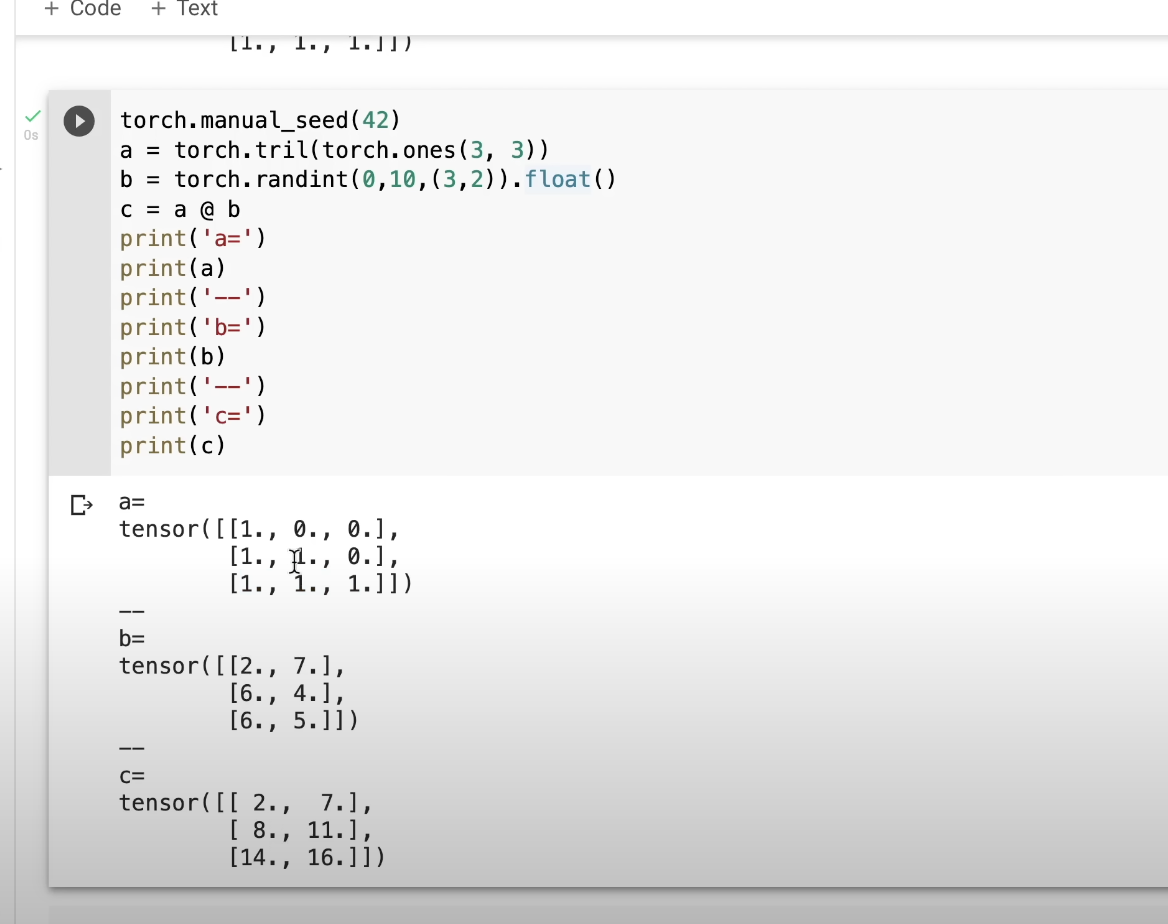

In [45]:
from IPython.display import Image
Image("Bildschirmfoto 2023-09-07 um 20.44.02.png")

In [ ]:
# we see that with this trill matrix we can sum up the element in the 
# zero dimension in the same way like above 

In [46]:
# toy example illustrating how matrix multiplication can be used for a "weighted aggregation"
torch.manual_seed(42)
a = torch.tril(torch.ones(3, 3))
a = a / torch.sum(a, 1, keepdim=True)
b = torch.randint(0,10,(3,2)).float()
c = a @ b
print('a=')
print(a)
print('--')
print('b=')
print(b)
print('--')
print('c=')
print(c)

a=
tensor([[1.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000],
        [0.3333, 0.3333, 0.3333]])
--
b=
tensor([[2., 7.],
        [6., 4.],
        [6., 5.]])
--
c=
tensor([[2.0000, 7.0000],
        [4.0000, 5.5000],
        [4.6667, 5.3333]])


In [48]:
# version 2: using matrix multiply for a weighted aggregation
# juhu we replaced the loop with matrix multiplication 
wei = torch.tril(torch.ones(T, T))
wei = wei / wei.sum(1, keepdim=True)
xbow2 = wei @ x # (B, T, T) @ (B, T, C) ----> (B, T, C)
torch.allclose(xbow, xbow2)

True

In [52]:
# version 3: use Softmax
tril = torch.tril(torch.ones(T, T))
wei = torch.zeros((T,T))
wei = wei.masked_fill(tril == 0, float('-inf'))
print(wei)
wei = F.softmax(wei, dim=-1)
# that is crazy 
print(wei)
xbow3 = wei @ x
torch.allclose(xbow, xbow3)

tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2000, 0.2000, 0.2000, 0.2000, 0.2000, 0.0000, 0.0000, 0.0000],
        [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.0000, 0.0000],
        [0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.1429, 0.0000],
        [0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250, 0.1250]])


True

In [55]:
# version 4: self-attention
torch.manual_seed(1337)
B,T,C = 4, 8, 32
x = torch.rand(B, T, C)
tril = torch.tril(torch.ones(T,T)) # (8,8) Dreiecksmatrix 
print(tril)
wei = torch.zeros((T, T))
# nodes from the future never talk to nodes in the past because they would give away the answer 
# that is why we mask out the future characters (future nodes) with negativ infinity 
# we implement a decoding block here because we try to decode language
# if we want to do sentiment analysis we would delete this line because 
# all the nodes can talk to each other
wei = wei.masked_fill(tril == 0, float('-inf'))
print(wei)
wei = F.softmax(wei, dim=-1)
print(wei)

tensor([[1., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1.]])
tensor([[0., -inf, -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., -inf, -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., -inf, -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., -inf, -inf, -inf, -inf],
        [0., 0., 0., 0., 0., -inf, -inf, -inf],
        [0., 0., 0., 0., 0., 0., -inf, -inf],
        [0., 0., 0., 0., 0., 0., 0., -inf],
        [0., 0., 0., 0., 0., 0., 0., 0.]])
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3333, 0.3333, 0.3333, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2500, 0.2500, 0.2500, 0.2500, 0.0000,

In [58]:
# (4,8,32) = (8,8) @ (4,8,32)
out = wei@x
print(out.shape)
out[0]

torch.Size([4, 8, 32])


tensor([[0.0783, 0.4956, 0.6231, 0.4224, 0.2004, 0.0287, 0.5851, 0.6967, 0.1761,
         0.2595, 0.7086, 0.5809, 0.0574, 0.7669, 0.8778, 0.2434, 0.6005, 0.7079,
         0.5102, 0.4065, 0.8864, 0.3578, 0.8963, 0.9639, 0.0148, 0.7358, 0.7884,
         0.9469, 0.4656, 0.8378, 0.1269, 0.2132],
        [0.1863, 0.4317, 0.5530, 0.5488, 0.3615, 0.2911, 0.5776, 0.4724, 0.3901,
         0.4836, 0.3938, 0.6719, 0.4141, 0.4206, 0.7269, 0.4644, 0.7552, 0.7382,
         0.6119, 0.2326, 0.8253, 0.6621, 0.9451, 0.8816, 0.0649, 0.7040, 0.4377,
         0.7755, 0.4449, 0.4690, 0.1054, 0.3746],
        [0.4263, 0.3797, 0.3773, 0.4383, 0.4679, 0.3290, 0.3993, 0.4645, 0.3643,
         0.6169, 0.3579, 0.5362, 0.5083, 0.3385, 0.6241, 0.4651, 0.8227, 0.6767,
         0.5627, 0.2755, 0.7978, 0.6396, 0.8043, 0.6204, 0.0506, 0.6505, 0.3151,
         0.8003, 0.4769, 0.4969, 0.3523, 0.4761],
        [0.5084, 0.4372, 0.2968, 0.5184, 0.3528, 0.4892, 0.3546, 0.5627, 0.4024,
         0.5916, 0.3513, 0.4405, 0.4336,

In [70]:
# let's see a single Head perform self-attention
torch.manual_seed(1337)
B,T,C = 4, 8, 32
x = torch.rand(B, T, C)


head_size = 16
# create the linear layers 
# in= 32, out = 16
key = nn.Linear(C, head_size, bias=False)
# in= 32, out = 16
query = nn.Linear(C, head_size, bias=False)
# in= 32, out = 16
value = nn.Linear(C, head_size, bias=False)
# simple matrix multiplication of the embedding vectors with the weights of the layers
# we call the forward function implicitly 
# we calculate input@weights 4x8x32@1x32x16 we add the one because of broadcasting 
k = key(x) # 4x8x16
q = query(x) # 4x8x16
v = value(x) # 4x8x16

# - -3 corresponds to the dimension of size 4
# - -2 corresponds to the dimension of size 8
# - -1 corresponds to the dimension of size 16

# When you call k.transpose(-2, -1), you swap the last two dimensions. 
# So now the dimensions of k become 4x16x8.
wei = q@k.transpose(-2, -1) # (4,8,16) @ (4,16,8) ---> (B, T, T)

In [71]:
tril = torch.tril(torch.ones(T,T)) # (8,8) Dreiecksmatrix 
# wei = torch.zeros((T, T))
# nodes from the future never talk to nodes in the past because they would give away the answer 
# that is why we mask out the future characters (future nodes) with negativ infinity 
# we implement a decoding block here because we try to decode language
# if we want to do sentiment analysis we would delete this line because 
# all the nodes can talk to each other
wei = wei.masked_fill(tril == 0, float('-inf'))
wei = F.softmax(wei, dim=-1)
print(wei[0])

out = wei@v
out.shape

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4409, 0.5591, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2975, 0.3373, 0.3652, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2211, 0.2898, 0.2236, 0.2654, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1832, 0.2163, 0.1954, 0.2437, 0.1614, 0.0000, 0.0000, 0.0000],
        [0.1330, 0.2227, 0.1784, 0.2159, 0.1044, 0.1456, 0.0000, 0.0000],
        [0.1283, 0.1367, 0.1385, 0.1522, 0.1083, 0.1341, 0.2021, 0.0000],
        [0.1064, 0.1332, 0.1265, 0.1445, 0.0940, 0.1200, 0.1231, 0.1524]],
       grad_fn=<SelectBackward0>)


torch.Size([4, 8, 16])